load libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


load Data

In [68]:
train_url = "https://raw.githubusercontent.com/cblancac/SentimentAnalysisBert/main/data/train_150k.txt"
test_url = "https://raw.githubusercontent.com/cblancac/SentimentAnalysisBert/main/data/test_62k.txt"

df_train = pd.read_csv(train_url, sep="\t", header=None, names=["feeling", "text"])
df_test = pd.read_csv(test_url, sep="\t", header=None, names=["feeling", "text"])

In [69]:
df_train

,feeling,text
0,0,Starting back at work today Looks like it'l...
1,1,Sugar levels dropping... munchies setting in. ...
2,1,@karineb22 yeah!!! have a great summer break!
3,1,hannah montana was very good. now going to re...
4,1,"@Mayra326 aww, have fun! I just had my 3D las..."
...,...,...
149980,0,Had a great night at Tabs but now I'm missing ...
149981,1,What a night at work.. Church in the morning
149982,0,this book is terrible im used 2 reading all ...
149983,0,@backstreetboys Updates? Any? I miss your upd...


In [70]:
df_test

,feeling,text
0,1,@justineville ...yeahhh. ) i'm 39 tweets from ...
1,0,@ApplesnFeathers aww. Poor baby! On your only ...
2,0,@joeymcintyre With my refunded $225 (Australia...
3,0,It's fine. Today sucks just because me those t...
4,0,"Im just chilling on psp and stuff, but sitting..."
...,...,...
61993,0,@VerityRobinson how come?! X
61994,0,Damn lost my voice no morning singing for me
61995,0,it's soooooo cold!!! my poor little fingers ar...
61996,1,@ohmymae oh i see. make you're MSN email righ...


Data Exploration

In [71]:
print(df_train.shape)
print(df_test.shape)

(149985, 2)
(61998, 2)


In [72]:
df_train.head()

,feeling,text
0,0,Starting back at work today Looks like it'l...
1,1,Sugar levels dropping... munchies setting in. ...
2,1,@karineb22 yeah!!! have a great summer break!
3,1,hannah montana was very good. now going to re...
4,1,"@Mayra326 aww, have fun! I just had my 3D las..."


In [73]:
df_train.tail()

,feeling,text
149980,0,Had a great night at Tabs but now I'm missing ...
149981,1,What a night at work.. Church in the morning
149982,0,this book is terrible im used 2 reading all ...
149983,0,@backstreetboys Updates? Any? I miss your upd...
149984,1,@lexiewohlfort I agree!


In [74]:
df_train.sample(3)

,feeling,text
11832,1,un vot pe blogoree daca merit: http://bit.ly/1...
88742,1,"looks like rain, mabey a good day to do some k..."
13185,0,Needs a way to graduation


In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149985 entries, 0 to 149984
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   feeling  149985 non-null  int64 
 1   text     149985 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [76]:
df_train.describe()

,feeling
count,149985.000000
mean,0.499823
std,0.500002
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [77]:
df_train.isnull()

,feeling,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
149980,False,False
149981,False,False
149982,False,False
149983,False,False


In [78]:
df_train.isnull().sum()

,0
feeling,0
text,0


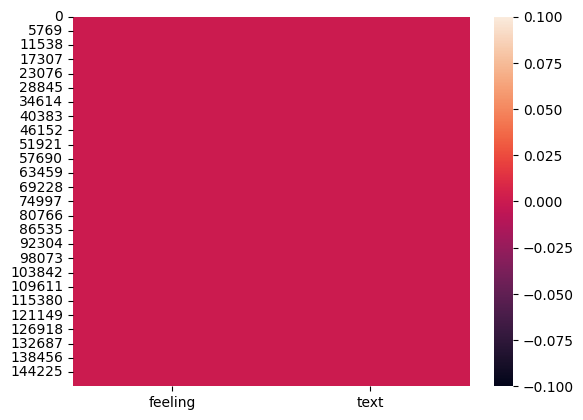

In [79]:
sns.heatmap(df_train.isnull())
plt.show()

In [80]:
df_train.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
149980,False
149981,False
149982,False
149983,False


In [81]:
df_train.duplicated().sum()

np.int64(0)

In [82]:
df_test.duplicated().sum()

np.int64(0)

Data Analysis

<ipython-input-83-8b2f22ff44c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='feeling', data=df_train, palette='coolwarm')


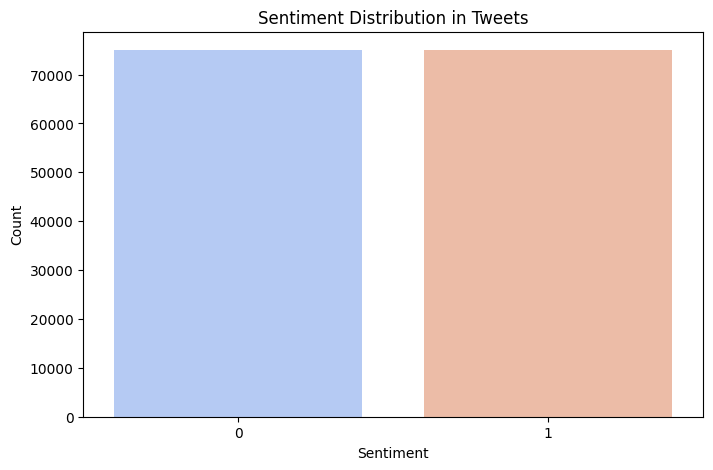

In [83]:
plt.figure(figsize=(8, 5))
sns.countplot(x='feeling', data=df_train, palette='coolwarm')
plt.title("Sentiment Distribution in Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

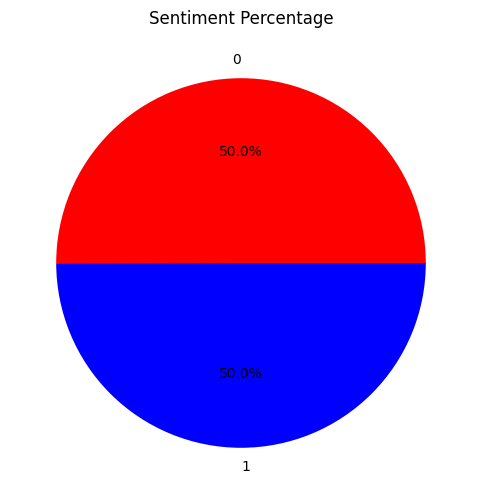

In [84]:
plt.figure(figsize=(6, 6))
df_train['feeling'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'blue', 'green'])
plt.title("Sentiment Percentage")
plt.ylabel("")
plt.show()

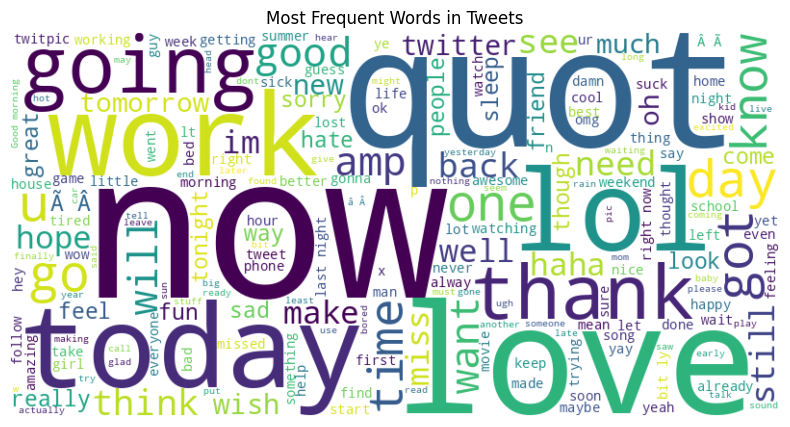

In [85]:
text_combined = " ".join(df_train['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Tweets")
plt.show()

<ipython-input-86-94a0abffd8b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='feeling', y='text_length', data=df_train, palette='coolwarm')


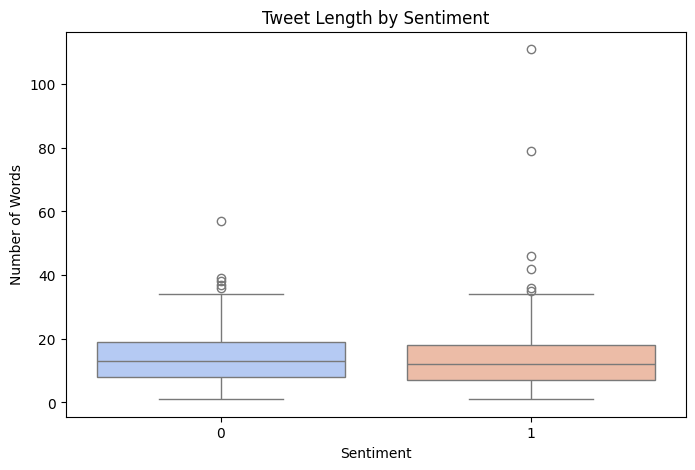

In [86]:
df_train['text_length'] = df_train['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 5))
sns.boxplot(x='feeling', y='text_length', data=df_train, palette='coolwarm')
plt.title("Tweet Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Words")
plt.show()

Delete Feature

In [87]:
df_train.drop('text_length', axis=1, inplace=True)

In [88]:
df_train

,feeling,text
0,0,Starting back at work today Looks like it'l...
1,1,Sugar levels dropping... munchies setting in. ...
2,1,@karineb22 yeah!!! have a great summer break!
3,1,hannah montana was very good. now going to re...
4,1,"@Mayra326 aww, have fun! I just had my 3D las..."
...,...,...
149980,0,Had a great night at Tabs but now I'm missing ...
149981,1,What a night at work.. Church in the morning
149982,0,this book is terrible im used 2 reading all ...
149983,0,@backstreetboys Updates? Any? I miss your upd...


Data Conversion

In [89]:
def clean_text(text):
    if pd.isnull(text):
        return ""

    text = text.lower()

    text = re.sub(r'http\S+|www.\S+', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(r'\d+', '', text)

    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_train['text'] = df_train['text'].apply(clean_text)

df_test['text'] = df_test['text'].apply(clean_text)

In [90]:
df_train

,feeling,text
0,0,starting back at work today looks like itll be...
1,1,sugar levels dropping munchies setting in luck...
2,1,karineb yeah have a great summer break
3,1,hannah montana was very good now going to read...
4,1,mayra aww have fun i just had my d last week
...,...,...
149980,0,had a great night at tabs but now im missing c...
149981,1,what a night at work church in the morning
149982,0,this book is terrible im used reading all make...
149983,0,backstreetboys updates any i miss your updates...


In [91]:
df_test

,feeling,text
0,1,justineville yeahhh im tweets from
1,0,applesnfeathers aww poor baby on your only rea...
2,0,joeymcintyre with my refunded australian ticke...
3,0,its fine today sucks just because me those thi...
4,0,im just chilling on psp and stuff but sitting ...
...,...,...
61993,0,verityrobinson how come x
61994,0,damn lost my voice no morning singing for me
61995,0,its soooooo cold my poor little fingers are su...
61996,1,ohmymae oh i see make youre msn email right no...


In [92]:
tfidf_vectorizer = TfidfVectorizer()
df_train_tfidf = tfidf_vectorizer.fit_transform(df_train['text'])
df_test_tfidf = tfidf_vectorizer.transform(df_test['text'])

print(df_train_tfidf)
print(df_test_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1749155 stored elements and shape (149985, 138773)>
  Coords	Values
  (0, 114306)	0.3364513406251732
  (0, 9029)	0.21347519125714154
  (0, 7616)	0.18092366342307736
  (0, 134290)	0.20972188606806413
  (0, 123254)	0.20572171296782787
  (0, 70043)	0.29437390694936266
  (0, 68300)	0.1980438743674637
  (0, 56219)	0.3637898236058223
  (0, 10418)	0.1795632231720478
  (0, 98563)	0.3311611269264622
  (0, 41319)	0.14930383769144626
  (0, 120251)	0.11294063762458478
  (0, 83579)	0.2669804121752478
  (0, 24961)	0.34914551326977233
  (0, 86418)	0.157478908153138
  (0, 28331)	0.2627389603767094
  (1, 120251)	0.07640332394515595
  (1, 116222)	0.2819085044731386
  (1, 67850)	0.3211961433084622
  (1, 33276)	0.3078254477770666
  (1, 81085)	0.36182755075647827
  (1, 107327)	0.2845132415445424
  (1, 54416)	0.2033582296817659
  (1, 71099)	0.30518594402591803
  (1, 48896)	0.1137801727520452
  :	:
  (149982, 121630)	0.12014674104867737
  (149982,

In [93]:
X = df_train_tfidf
y = df_train["feeling"]

In [94]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=22,
                                    shuffle = True)

In [95]:
model1 = SGDClassifier()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(model1.score(X_train,y_train))

0.7751286769608235
0.7948936775478274


LogisticRegression is the winner

In [96]:
model2 = LogisticRegression(
    solver='liblinear',
    penalty='l2',
    C=1.0,
    max_iter=200,
    class_weight='balanced'
)

model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(model2.score(X_train,y_train))

0.7838760434168067
0.8416720005689495


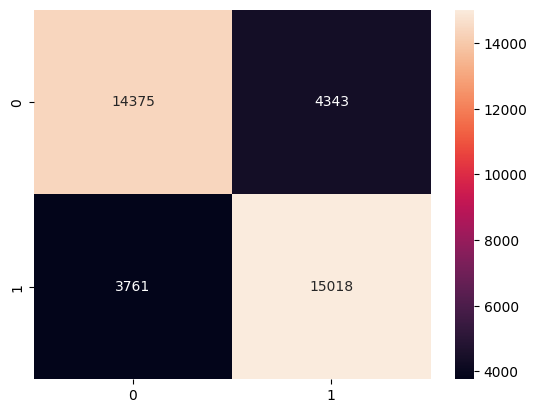

In [97]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='g')
plt.show()

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     18718
           1       0.78      0.80      0.79     18779

    accuracy                           0.78     37497
   macro avg       0.78      0.78      0.78     37497
weighted avg       0.78      0.78      0.78     37497



In [100]:
pre = model2.predict(df_test_tfidf)
pre

array([1, 0, 0, ..., 0, 1, 0])

In [101]:
import pickle

with open("model.TWITTER SENTIMENT ANALYSIS", "wb") as f:
    pickle.dump(model2, f)